# 신작 비디오게임을 출시한다면 어떻게 해야하는가?
* 장르 선정
* 수출국 순위
* 퍼블리셔

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [21]:
file_path = '../data/Video Games Sales.csv'

video_games = pd.read_csv(file_path,encoding='UTF-8')

## 데이터 원본 분석

In [22]:
# 데이터 정보
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


* 특이사항 <br>Year 열이 float64 형으로 있다.

In [23]:
# 데이터 사이즈
video_games.shape

(1907, 13)

* 1907행 13열의 데이터

In [24]:
video_games.head(10)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
5,5,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,10.85,8.87,6.48,2.88,29.08,90.00
6,6,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.83,9.11,2.93,2.84,28.71,61.64
7,7,8,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,84.00
8,8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,13.35,6.48,4.66,2.25,26.75,88.18
9,9,10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.02,10.81,1.93,2.73,24.50,85.00


In [25]:
video_games.tail(10)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
1897,1897,1898,Ace Combat 3: Electrosphere,PS,1999.0,Simulation,Sony Computer Entertainment,0.22,0.15,0.40,0.05,0.83,73.92
1898,1898,1899,Dynasty Warriors 2,PS2,2000.0,Action,THQ,0.24,0.19,0.34,0.06,0.83,71.88
1899,1899,1900,Madden NFL 07,PSP,NaN,Sports,Unknown,0.77,0.03,0.00,0.04,0.83,84.00
1900,1900,1901,Army of Two: The 40th Day,X360,2010.0,Shooter,Electronic Arts,0.52,0.22,0.00,0.08,0.83,72.32
1901,1901,1902,Medal of Honor: Warfighter,X360,2012.0,Shooter,Electronic Arts,0.42,0.32,0.01,0.09,0.83,68.00
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00
1906,1906,1907,WWE SmackDown vs. Raw 2011,X360,2010.0,Fighting,THQ,0.42,0.32,0.00,0.09,0.83,82.00


## 결측치 확인

In [26]:
video_games.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

* Year열과 Publisher에 결측치 확인

In [27]:
video_games[video_games.Year.isnull()]

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
143,143,144,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,87.00
253,253,254,RollerCoaster Tycoon,PC,NaN,Strategy,Unknown,3.82,0.01,0.00,0.00,3.83,87.00
301,301,302,FIFA Soccer 2004,PS2,NaN,Sports,Unknown,0.59,2.36,0.04,0.51,3.49,81.00
373,373,374,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,91.00
434,434,435,LEGO Batman: The Videogame,Wii,NaN,Adventure,Warner Bros. Interactive Entertainment,1.59,0.86,0.00,0.27,2.72,80.00
523,523,524,Rock Band,X360,NaN,Misc,Electronic Arts,1.88,0.31,0.00,0.21,2.40,77.00
524,524,525,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Unknown,2.15,0.18,0.00,0.07,2.39,69.00
573,573,574,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Adventure,LucasArts,1.44,0.57,0.00,0.21,2.22,81.00
582,582,583,Call of Duty 3,Wii,NaN,Shooter,Unknown,1.13,0.82,0.00,0.23,2.18,69.91
646,646,647,Rock Band,Wii,NaN,Misc,MTV Games,1.31,0.54,0.00,0.20,2.05,80.13


* Year에서 결측치가 발생한 데이터를 확인했더니 특이사항으로 Publisher 또한 Unknown이거나 NaN인 값이 다수<br>
* Publisher에서 발생한 결측치 또한 같은 데이터에서 함께 확인 했다.

In [28]:
video_games[video_games.Publisher.isnull()]

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
373,373,374,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00,91.00
1016,1016,1017,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46,69.72


In [29]:
video_games.query('Publisher == "Unknown" or Publisher =="NaN"')

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
253,253,254,RollerCoaster Tycoon,PC,NaN,Strategy,Unknown,3.82,0.01,0.00,0.00,3.83,87.00
286,286,287,WWF SmackDown!,PS,2000.0,Fighting,Unknown,2.01,1.35,0.06,0.16,3.58,81.00
301,301,302,FIFA Soccer 2004,PS2,NaN,Sports,Unknown,0.59,2.36,0.04,0.51,3.49,81.00
524,524,525,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Unknown,2.15,0.18,0.00,0.07,2.39,69.00
582,582,583,Call of Duty 3,Wii,NaN,Shooter,Unknown,1.13,0.82,0.00,0.23,2.18,69.91
746,746,747,Gran Turismo Concept 2001 Tokyo,PS2,NaN,Racing,Unknown,0.00,1.10,0.42,0.33,1.84,80.00
1275,1275,1276,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22,81.00
1424,1424,1425,Rock Band,PS2,NaN,Misc,Unknown,0.71,0.30,0.00,0.11,1.11,82.00
1631,1631,1632,Suikoden III,PS2,NaN,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98,87.00
1676,1676,1677,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95,55.00


*  Unknown으로 값이 들어간 데이터 확인

In [30]:
video_games.query('Publisher == "Unknown"').count()

index            14
Rank             14
Game Title       14
Platform         14
Year              1
Genre            14
Publisher        14
North America    14
Europe           14
Japan            14
Rest of World    14
Global           14
Review           14
dtype: int64

In [31]:
video_games.query('Publisher == "Unknown" or Publisher =="NaN"').count()

index            14
Rank             14
Game Title       14
Platform         14
Year              1
Genre            14
Publisher        14
North America    14
Europe           14
Japan            14
Rest of World    14
Global           14
Review           14
dtype: int64

* 퍼블리셔가 Unknown인 데이터와 플랫폼이 NaN인 데이터 수가 같다

### 처리 방안
#### dropna()를 이용해서 결측치를 drop 시킨다.
### 처리 이유
#### 둘 이상의 데이터가 없으면 어떤 데이터 인지 판명불가

In [32]:
video_games.dropna(inplace=True)

In [33]:
video_games.isnull().sum()

index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

In [34]:
video_games.query('Publisher == "Unknown" or Publisher =="NaN"')

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
286,286,287,WWF SmackDown!,PS,2000.0,Fighting,Unknown,2.01,1.35,0.06,0.16,3.58,81.0


* 추가 적으로 남아 있는 Unknown 데이터 1건 확인

In [35]:
video_games.Publisher.unique()

array(['Nintendo', 'Take-Two Interactive', 'Microsoft Game Studios',
       'Sony Computer Entertainment', 'Activision', 'Electronic Arts',
       'Ubisoft', 'Red Orb', 'Square', 'Bethesda Softworks', 'Capcom',
       '505 Games', 'GT Interactive', 'Konami Digital Entertainment',
       'Sega', 'Square Enix', 'Virgin Interactive',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'LucasArts', 'Atari', 'Vivendi Games', 'Enix Corporation',
       'Namco Bandai Games', 'Warner Bros. Interactive Entertainment',
       'Hasbro Interactive', 'Unknown', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment', 'Level 5',
       'MTV Games', 'Codemasters', 'id Software', 'Havas Interactive',
       'Majesco Entertainment', 'Midway Games', 'Hudson Soft', 'JVC',
       'Valve Software', '989 Studios', 'Maxis', 'Square EA',
       'Tecmo Koei', 'Gotham Games', 'Deep Silver', 'Infogrames',
       'Arena Entertainment', 'Mindscape', 'Banpresto', 'NCSoft',
       'C

In [36]:
video_games.loc[286,'Publisher'] = 'THQ'

* 해당 데이터는 정확한 값을 넣을 수 있으므로 Unique로 일치하는 데이터 확인 후 데이터 직접 삽입으로 처리.

In [37]:
video_games.query('Publisher == "Unknown" or Publisher =="NaN"')

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review


---

In [53]:
video_games['Year'] = video_games['Year'].astype('int64')

In [54]:
video_games.sort_values(by='Year',ascending=True)

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
559,559,560,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28,91.00
597,597,598,Mahjong,NES,1983,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14,80.00
1438,1438,1439,Popeye,NES,1983,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10,68.00
1398,1398,1399,Donkey Kong,NES,1983,Platform,Nintendo,0.23,0.05,0.84,0.01,1.13,77.00
1428,1428,1429,Donkey Kong Jr.,NES,1983,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11,75.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1565,1566,One Piece Pirate Musou,PS3,2012,Action,Namco Bandai Games,0.00,0.12,0.86,0.04,1.02,78.00
360,360,361,Diablo III,PC,2012,Role-Playing,Activision,1.56,1.09,0.00,0.40,3.05,87.64
136,136,137,Just Dance 4,Wii,2012,Misc,Ubisoft,3.03,1.78,0.00,0.51,5.32,57.00
438,438,439,Mass Effect 3,X360,2012,Role-Playing,Electronic Arts,1.73,0.69,0.03,0.25,2.70,92.17


##### 전처리 완료

In [38]:
video_games

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


## 데이터 1차 분석

### 퍼블리셔 순위

In [39]:
review_Publisher = video_games.groupby('Publisher')['Global'].mean()
review_Publisher.round(1).sort_values(ascending=False)

Publisher
Red Orb                   5.2
Nintendo                  4.9
Microsoft Game Studios    3.6
505 Games                 3.6
RedOctane                 2.9
                         ... 
Crystal Dynamics          0.9
CTO SpA                   0.9
Rage Software             0.9
ASCII Entertainment       0.9
Pinnacle                  0.8
Name: Global, Length: 93, dtype: float64

### 게임 순위

In [40]:
review_Publisher2 = video_games.groupby('Game Title')['Global'].max()
review_Publisher2.round(1).sort_values(ascending=False)

Game Title
Wii Sports                        81.1
Super Mario Bros.                 40.2
Mario Kart Wii                    33.6
Wii Sports Resort                 31.5
Tetris                            30.3
                                  ... 
Petz Dogz Fashion                  0.8
Samba De Amigo                     0.8
Metroid: Zero Mission              0.8
FIFA Soccer World Championship     0.8
Burnout 2: Point of Impact         0.8
Name: Global, Length: 1505, dtype: float64

In [41]:
find_data = 'Wii Sports'
video_games.loc[video_games['Game Title']==find_data,:]

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28


### 장르 순위

In [42]:
review_genre = video_games.groupby('Genre')['Global'].mean()
df_review_genre = review_genre.sort_values(ascending=False).to_frame()
df_review_genre.reset_index(inplace=True)
df_review_genre

,Genre,Global
0,Platform,3.189677
1,Role-Playing,2.889123
2,Misc,2.726471
3,Shooter,2.713627
4,Puzzle,2.469318
5,Racing,2.438804
6,Action,2.331360
7,Sports,2.281221
8,Simulation,2.229783
9,Adventure,2.191524


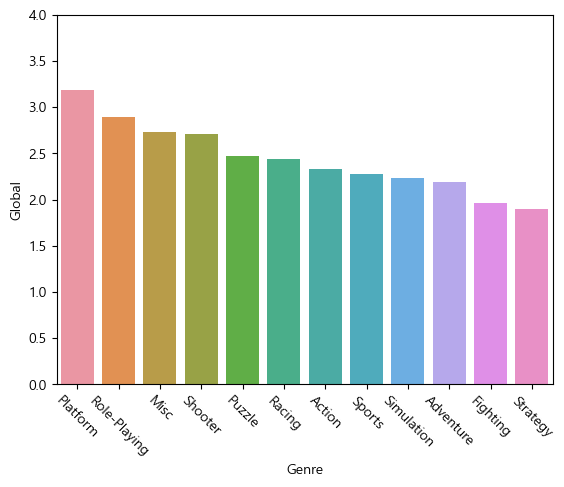

In [43]:
sns.barplot(data=df_review_genre,x="Genre",y="Global")
plt.xticks(rotation=-45)
plt.ylim(0,4)
plt.show()

### 국가 순위

In [44]:
all_genre2 = video_games.groupby('Genre')['North America','Europe','Japan','Rest of World','Global'].sum()
all_genre2.sort_values(by='North America',inplace=True)

C:\Users\castlemin\AppData\Local\Temp\ipykernel_13936\1310873940.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_genre2 = video_games.groupby('Genre')['North America','Europe','Japan','Rest of World','Global'].sum()


In [45]:
tot = [(all_genre2['Japan'].sum()/all_genre2['Global'].sum()),
       (all_genre2['North America'].sum()/all_genre2['Global'].sum()),
       (all_genre2['Europe'].sum()/all_genre2['Global'].sum()),
       (all_genre2['Rest of World'].sum()/all_genre2['Global'].sum())]

tot = pd.DataFrame(tot)
tot.index = ['Japan','North America','Europe','Rest of World']
tot.reset_index(inplace=True)

In [46]:
tot.columns=['나라','소비량']

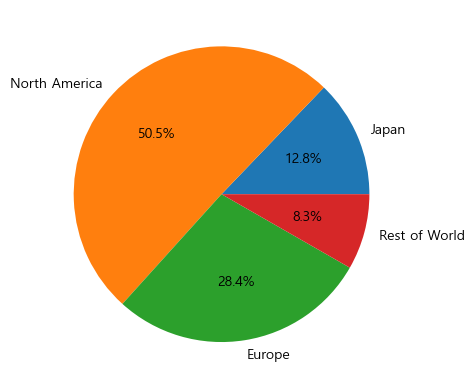

In [47]:
plt.pie(tot['소비량'], labels=tot['나라'], autopct='%.1f%%')

plt.show()

---

## 데이터 2차 분석

In [48]:
all_genre = video_games.groupby('Genre')['North America','Europe','Japan','Rest of World'].sum()
all_genre.sort_values(by='North America',inplace=True)
all_genre

C:\Users\castlemin\AppData\Local\Temp\ipykernel_13936\3236258687.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  all_genre = video_games.groupby('Genre')['North America','Europe','Japan','Rest of World'].sum()


,North America,Europe,Japan,Rest of World
Genre,,,,
Strategy,41.66,18.16,10.72,3.47
Puzzle,60.72,18.58,25.00,4.35
Simulation,101.13,64.08,24.31,15.53
Adventure,110.98,74.82,26.38,17.98
Fighting,131.50,62.47,34.01,18.03
Role-Playing,197.25,100.67,167.76,28.45
Misc,199.36,129.47,50.78,37.46
Racing,213.75,150.06,43.37,41.59
Platform,315.68,138.98,104.17,34.36


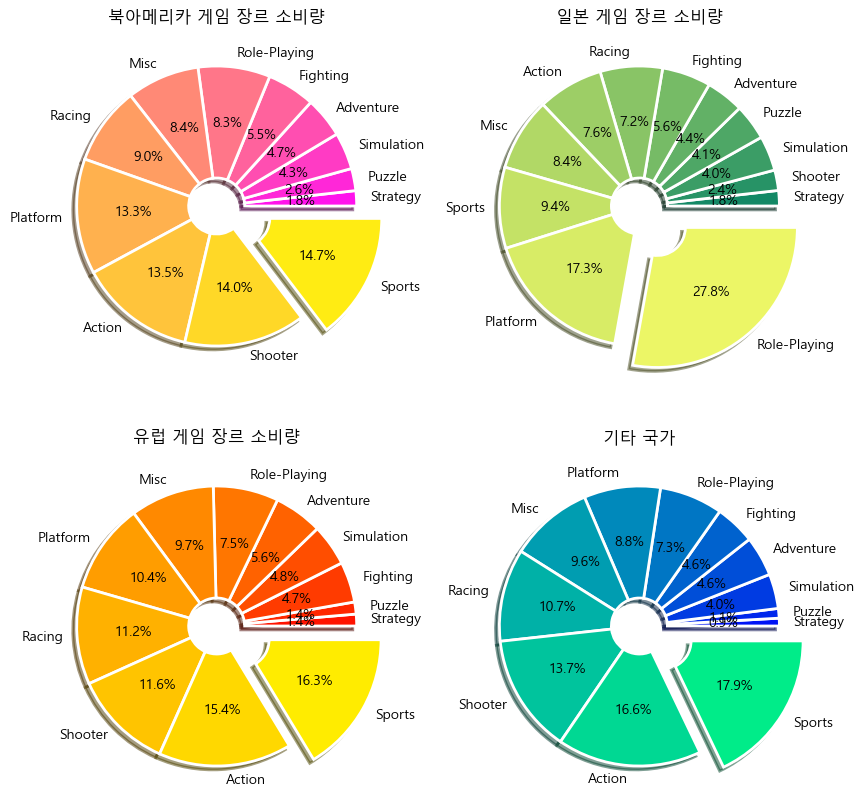

In [49]:
color1 = sns.color_palette('spring',len(all_genre))
color2 = sns.color_palette('summer',len(all_genre))
color3 = sns.color_palette('autumn',len(all_genre))
color4 = sns.color_palette('winter',len(all_genre))
explode = (0, 0, 0, 0, 0, 0,0,0,0,0,0,0.2)
wedgeprops={'width': 0.8, 'edgecolor': 'w', 'linewidth': 2}
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.pie(all_genre['North America'].sort_values(), labels=all_genre['North America'].sort_values().index ,autopct='%.1f%%', shadow=True, colors=color1,explode=explode,wedgeprops=wedgeprops)
plt.title('북아메리카 게임 장르 소비량')


plt.subplot(2, 2, 2)
plt.pie(all_genre['Japan'].sort_values(), labels=all_genre['Japan'].sort_values().index ,autopct='%.1f%%', shadow=True, colors=color2,explode=explode,wedgeprops=wedgeprops)
plt.title('일본 게임 장르 소비량')

plt.subplot(2, 2, 3)
plt.pie(all_genre['Europe'].sort_values(), labels=all_genre['Europe'].sort_values().index ,autopct='%.1f%%', shadow=True, colors=color3,explode=explode,wedgeprops=wedgeprops)
plt.title('유럽 게임 장르 소비량')

plt.subplot(2, 2, 4)
plt.pie(all_genre['Rest of World'].sort_values(), labels=all_genre['Rest of World'].sort_values().index ,autopct='%.1f%%', shadow=True, colors=color4,explode=explode,wedgeprops=wedgeprops)
plt.title('기타 국가')

plt.show()

In [50]:
# 기준1. 리뷰 점수 1위 퍼블리셔 선정
sports_publisher = video_games.loc[video_games['Genre']=='Sports',:]
sports_publisher.loc[sports_publisher['Review'] == sports_publisher['Review'].max(),:]

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
1457,1457,1458,NFL 2K1,DC,2000.0,Sports,Sega,1.02,0.05,0.0,0.02,1.09,94.5


In [51]:
# 기준2. 전체 게임 제작 수 비례하여 리뷰 평균이 높은 퍼블리셔 선정
sports_publisher = video_games.loc[video_games['Genre']=='Sports',:]
tmp = sports_publisher.loc[sports_publisher['Genre']=='Sports',['Publisher','Review']]
df_tmp = tmp.groupby('Publisher')['Review'].mean().round(1)
df_tmp = df_tmp.to_frame()
df_tmp = df_tmp.sort_values(by='Review',ascending=False)
df_tmp.reset_index(inplace=True)
df_tmp.head()

,Publisher,Review
0,Arena Entertainment,85.0
1,Global Star,84.2
2,Midway Games,83.2
3,Sega,82.4
4,Russel,82.2


## 결론
- 게임 장르 : 스포츠
- 수출국 우선 순위 : 북미-유럽-일본-기타 순
- 퍼블리셔 선정 : 두가지 기준